In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(rc={'figure.figsize': [13, 8]}, font_scale=1)

In [2]:
import pandas as pd

df = pd.read_csv('D:\Data_science\ML_project1\P1_Churn_Modelling.csv', sep=',')


In [3]:
print(df['Gender'].head(10))  # Check the first 10 values
print(df['Gender'].dtype)  # Check the data type


0    Female
1    Female
2    Female
3    Female
4    Female
5      Male
6      Male
7    Female
8      Male
9      Male
Name: Gender, dtype: object
object


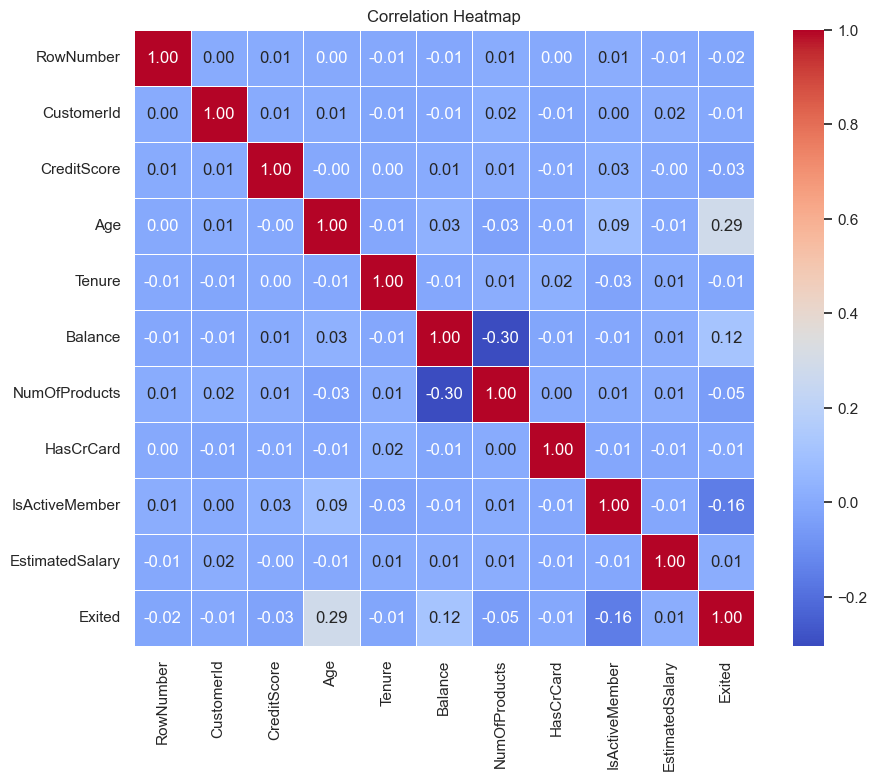

In [9]:
# Compute correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
print(df['Gender'].unique())  # See the exact values stored

# df.info()

['Female' 'Male']


In [11]:

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


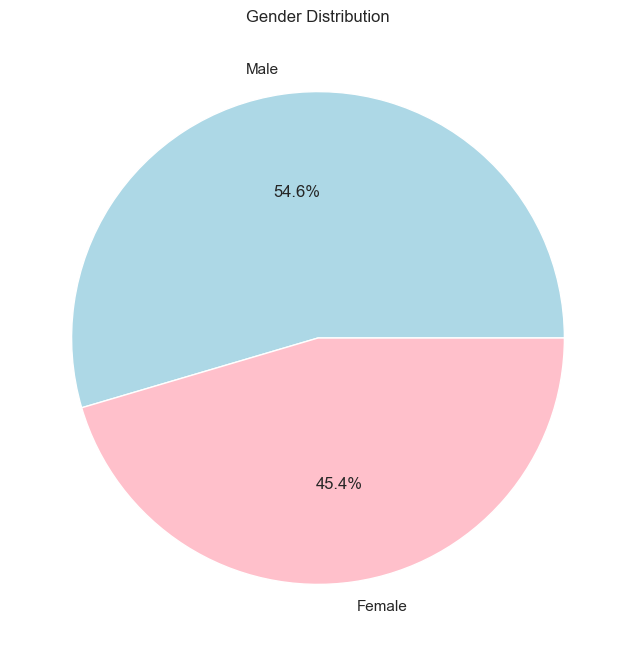

In [13]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title("Gender Distribution")
plt.ylabel("")  # Hide label
plt.show()


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
import pandas as pd

# Normalize gender values
df['Gender'] = df['Gender'].astype(str).str.strip().str.lower()

# Convert Male/Female to 1/0 and explicitly set type
df['Gender'] = df['Gender'].replace({'male': 1, 'female': 0}).astype(int)


df['Geography'] = df['Geography'].astype(str).str.strip().str.lower()  # Normalize
df['Geography'] = df['Geography'].replace({'france': 1, 'spain': 2, 'germany': 3}).astype(int)  # Convert


In [8]:
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,3,1,42,3,75075.31,2,1,0,92888.52,1


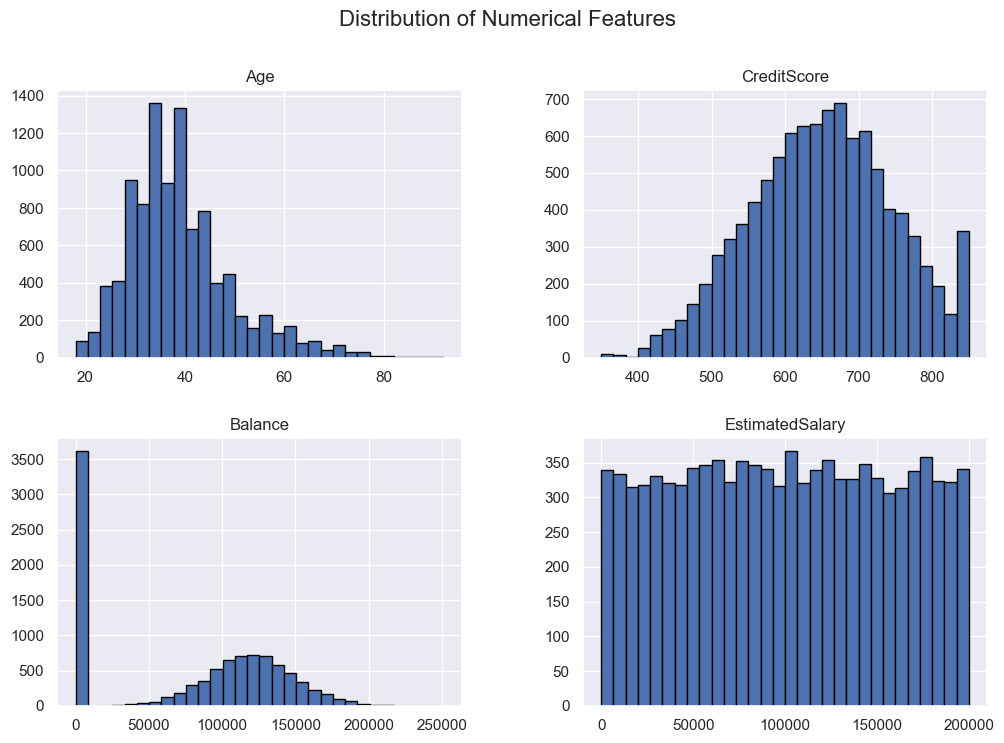

In [9]:


df[['Age', 'CreditScore', 'Balance', 'EstimatedSalary']].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


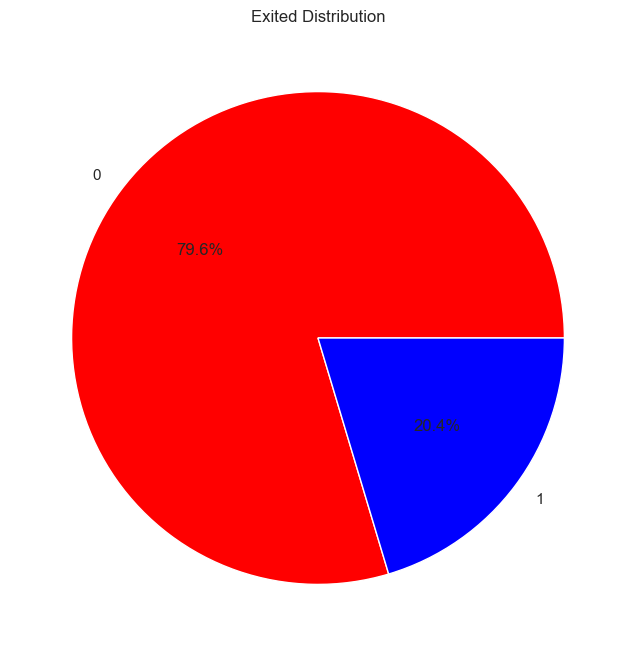

In [18]:
df['Exited'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'blue'])
plt.title("Exited Distribution")
plt.ylabel("")  # Hide label
plt.show()


In [18]:
 # X يحتوي على جميع الأعمدة ما عدا "Exited"
df_cleaned = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

X = df_cleaned.drop(columns=["Exited"])

# y يحتوي فقط على العمود المستهدف "Exited"
y = df_cleaned["Exited"]

# تقسيم البيانات إلى 80% تدريب و 20% اختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert y_train_resampled to Pandas Series
y_train_resampled = pd.Series(y_train_resampled)

# Convert X_train_resampled back to DataFrame with original column names
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)

# Check class distribution after SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: Exited
0    6356
1    1644
Name: count, dtype: int64
After SMOTE: Exited
0    6356
1    6356
Name: count, dtype: int64


In [23]:
# **K-Nearest Neighbors (KNN)**

In [15]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [16]:
#
df['Gender'] = df['Gender'].astype(str).str.strip().str.lower()  # Normalize
df['Gender'] = df['Gender'].replace({'male': 1, 'female': 0, 'm': 1, 'f': 0}).fillna(-1)  # Convert & Handle NaN

df['Gender'] = df['Gender'].astype(str).str.strip().str.lower()  # Normalize
df['Gender'] = df['Gender'].replace({'male': 1, 'female': 0, 'm': 1, 'f': 0}).fillna(-1)  # Convert & Handle NaN

print(df['Gender'].unique())  # Now should be [1, 0, -1]

print(df['Gender'].unique())  # Now should be [1, 0, -1]


['0' '1']
['0' '1']


In [20]:
# Step 3: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Step 4: Use Grid Search to find the best value for k (from 1 to 10)
param_grid = {'n_neighbors': range(1, 11)}  # Try k from 1 to 10
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)})

In [28]:
# Step 5: Get the best value of k
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value for k: {best_k}")

Best value for k: 10


In [29]:
# Step 6: Train KNN with the best k and make predictions
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

In [30]:
# Step 7: Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k={best_k}: {accuracy:.2f}")

Accuracy with k=10: 0.80


In [31]:
# Step 8: Visualize the accuracy for different values of k
k_values = range(1, 11)
accuracies = []


In [32]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

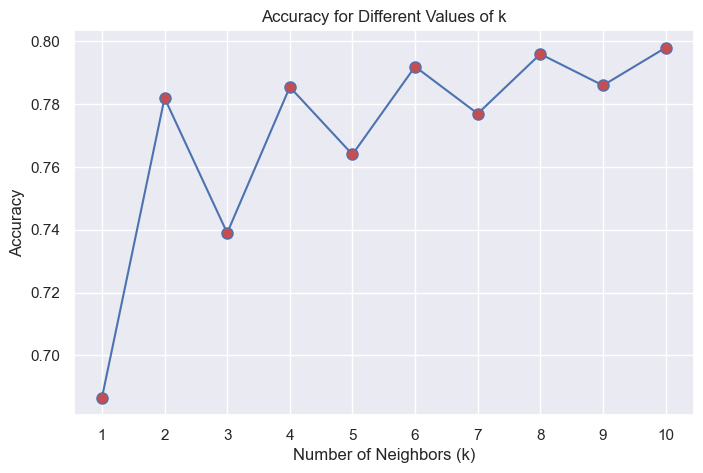

In [33]:
# Plot the accuracies for each value of k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', markerfacecolor='r', markersize=8)
plt.title('Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [90]:
# **Support Vector Machines (SVM)**


In [29]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Step 5: Train an SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

In [ ]:
# Step 6: Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [ ]:
# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM: {accuracy:.2f}")

In [ ]:
# Step 8: Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

In [ ]:
# Step 9: Visualize the decision boundary
# Create a mesh grid for plotting decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [21]:
# Plot decision boundaries
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

NameError: name 'svm_model' is not defined

In [11]:
# **Naive Bayes**

In [12]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Step 3: Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

In [24]:
# Step 4: Train the model
gnb.fit(X_train, y_train)

GaussianNB()

In [25]:
# Step 5: Make predictions on the test data
y_pred = gnb.predict(X_test)

In [25]:
# Step 6: Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [26]:
# Additional: Confusion matrix and classification report
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_report = metrics.classification_report(y_test, y_pred)

In [27]:
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[2337   79]
 [ 537   47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      2416
           1       0.37      0.08      0.13       584

    accuracy                           0.79      3000
   macro avg       0.59      0.52      0.51      3000
weighted avg       0.73      0.79      0.74      3000



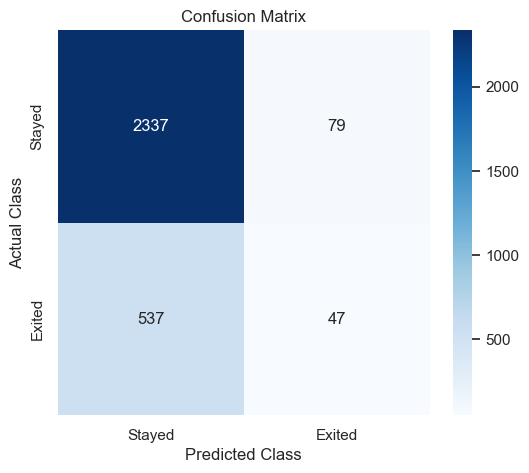

In [30]:

# df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Exited"], yticklabels=["Stayed", "Exited"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [31]:
# **Decision Tree**

In [41]:
# Import necessary libraries
from sklearn.model_selection import train_test_split  # Split dataset into training and testing sets
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree classifier
from sklearn import metrics  # For evaluating the model performance

In [45]:
# Step 2: Split the dataset into training and testing sets
# 80% of data will be used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Step 3: Create the Decision Tree classifier
# We'll use the Gini Index (default criterion) to measure node impurity
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)  # max_depth controls the depth of the tree

In [47]:
# Step 4: Train the model (fit the classifier to the training data)
clf = clf.fit(X_train, y_train)

In [48]:
# Step 5: Make predictions on the test data
y_pred = clf.predict(X_test)

In [49]:
# Step 6: Evaluate the model's performance using accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


In [50]:
# Additional: Visualize the Decision Tree (requires graphviz library)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

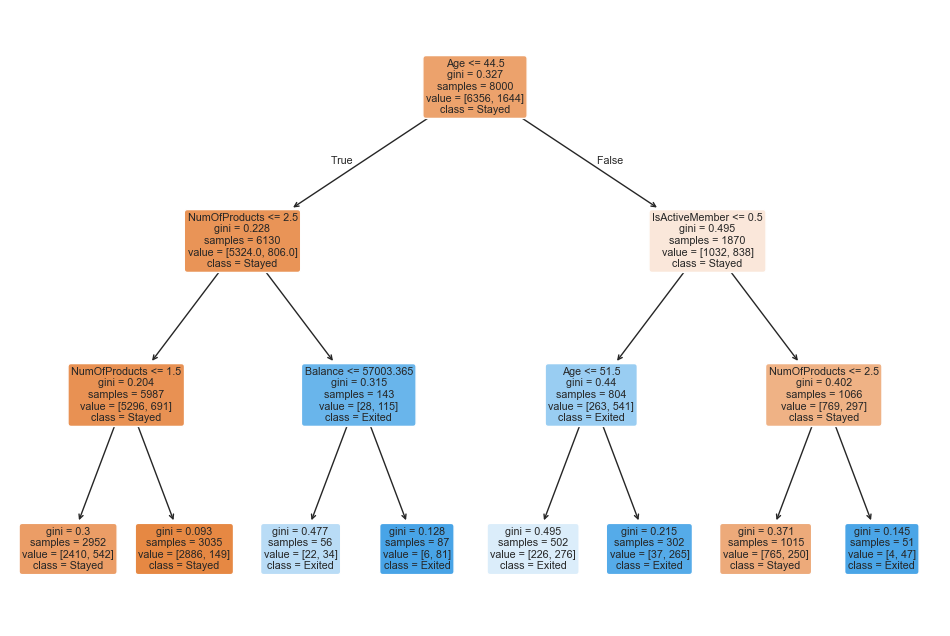

In [51]:
# Plot the tree structure
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Stayed", "Exited"], rounded=True)
plt.show()